In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/MyDrive/datasetb2d9982.zip

Archive:  gdrive/MyDrive/datasetb2d9982.zip
   creating: dataset/
  inflating: dataset/sample_submission.csv  
  inflating: dataset/train.csv       
  inflating: dataset/test.csv        


In [4]:
df=pd.read_csv('dataset/train.csv')
df

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
...,...,...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,Material : Polyester,NaN,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[❤ [Inspiration] Inspired by the Untitled Goos...,<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,NaN,NaN,592,2900.000000


In [5]:
test=pd.read_csv(r"dataset/test.csv")
test

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318
...,...,...,...,...,...
734731,921419,"Casual Canine Basic Hoodie for Dogs, 16"" Mediu...",[Brightly colored pet sweatshirts with authent...,"ZA6015 16 43 Size-See Chart Below: Medium: 16""...",7073
734732,2456362,Dive Log Book: Scuba Diving Logbook for Beginn...,NaN,NaN,1
734733,841529,Axor 39135001 Citterio Widespread Faucet with ...,"[8-Inch centers,1/2-Inch IPS inlets,9-Inch spo...",39135001 Features: -ADA compliant. -Includes p...,10645
734734,1190194,Caroline's Treasures BB1801DS812 Halloween Bas...,"[Indoor or outdoor aluminum artwork prints,8 i...",Features. Great for inside or outside these Al...,12680


In [6]:
df.isna().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [9]:
df

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
...,...,...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,Material : Polyester,NaN,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[❤ [Inspiration] Inspired by the Untitled Goos...,<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,NaN,NaN,592,2900.000000


In [8]:
dataset = df.copy()

In [10]:
dataset = dataset.drop(['BULLET_POINTS'], axis = 1)
dataset = dataset.drop(['DESCRIPTION'], axis = 1)

In [11]:
colname = dataset.columns
headers = colname.tolist()
other_features = []
other_features = headers[6:8]

In [12]:
dataset

,PRODUCT_ID,TITLE,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,6112,598.424000
...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,592,2900.000000


In [13]:
dataset.isna().sum()

PRODUCT_ID          0
TITLE              12
PRODUCT_TYPE_ID     0
PRODUCT_LENGTH      0
dtype: int64

In [14]:
dataset=dataset.drop(['TITLE'],axis=1)

In [15]:
dataset

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,1650,2125.980000
1,2673191,2755,393.700000
2,2765088,7537,748.031495
3,1594019,2996,787.401574
4,283658,6112,598.424000
...,...,...,...
2249693,2422167,3009,1181.100000
2249694,2766635,3413,125.984252
2249695,1987786,1574,1200.000000
2249696,1165754,592,2900.000000


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   PRODUCT_TYPE_ID  int64  
 2   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2)
memory usage: 51.5 MB


In [17]:

X = dataset
X = X.drop(["PRODUCT_LENGTH"], axis=1)
X.replace(np.nan, )

Y = dataset["PRODUCT_LENGTH"]

In [18]:
# # TEST files 
# X1 = test
# X1 = X1.drop(["PRODUCT_LENGTH"], axis=1)
# X1.replace(np.nan, )

# Y1 = test["PRODUCT_LENGTH"]

In [19]:
test= test.drop(['BULLET_POINTS'], axis = 1)
test=test.drop(['DESCRIPTION'], axis = 1)

In [20]:
test.isna().sum()

PRODUCT_ID         0
TITLE              5
PRODUCT_TYPE_ID    0
dtype: int64

In [21]:
test['TITLE']=test.TITLE.dropna()

In [22]:
# Get last index for the last availbe power values in given dataset
last_empty_power_index = dataset["PRODUCT_LENGTH"].last_valid_index()
print(last_empty_power_index)

2249697


In [23]:
x_known = X[X.index <= last_empty_power_index]

# x_unknown = X.iloc[len(x_known):len(X)]
y_known = Y[Y.index <= last_empty_power_index]
# y_unknown = Y.iloc[len(y_known):len(Y)]

In [24]:
x_train = x_known.iloc[0:len(x_known)]
y_train = y_known.iloc[0:len(y_known)]

x_test = test.iloc[0:len(x_known)]     #x_known.iloc[len(x_known)-test_period: len(x_known)]
y_test = test.iloc[0:len(y_known)]                              #y_known.iloc[len(y_known)-test_period: len(y_known)]

In [25]:
x_known

,PRODUCT_ID,PRODUCT_TYPE_ID
0,1925202,1650
1,2673191,2755
2,2765088,7537
3,1594019,2996
4,283658,6112
...,...,...
2249693,2422167,3009
2249694,2766635,3413
2249695,1987786,1574
2249696,1165754,592


In [26]:
y_known

0          2125.980000
1           393.700000
2           748.031495
3           787.401574
4           598.424000
              ...     
2249693    1181.100000
2249694     125.984252
2249695    1200.000000
2249696    2900.000000
2249697    2000.000000
Name: PRODUCT_LENGTH, Length: 2249698, dtype: float64

In [27]:
x_train

,PRODUCT_ID,PRODUCT_TYPE_ID
0,1925202,1650
1,2673191,2755
2,2765088,7537
3,1594019,2996
4,283658,6112
...,...,...
2249693,2422167,3009
2249694,2766635,3413
2249695,1987786,1574
2249696,1165754,592


In [28]:
x_train.shape


(2249698, 2)

In [29]:
y_train

0          2125.980000
1           393.700000
2           748.031495
3           787.401574
4           598.424000
              ...     
2249693    1181.100000
2249694     125.984252
2249695    1200.000000
2249696    2900.000000
2249697    2000.000000
Name: PRODUCT_LENGTH, Length: 2249698, dtype: float64

In [30]:
x_test

,PRODUCT_ID,TITLE,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",6318
...,...,...,...
734731,921419,"Casual Canine Basic Hoodie for Dogs, 16"" Mediu...",7073
734732,2456362,Dive Log Book: Scuba Diving Logbook for Beginn...,1
734733,841529,Axor 39135001 Citterio Widespread Faucet with ...,10645
734734,1190194,Caroline's Treasures BB1801DS812 Halloween Bas...,12680


In [31]:
y_test

,PRODUCT_ID,TITLE,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",6318
...,...,...,...
734731,921419,"Casual Canine Basic Hoodie for Dogs, 16"" Mediu...",7073
734732,2456362,Dive Log Book: Scuba Diving Logbook for Beginn...,1
734733,841529,Axor 39135001 Citterio Widespread Faucet with ...,10645
734734,1190194,Caroline's Treasures BB1801DS812 Halloween Bas...,12680


In [ ]:
'''MODEL'''

input_=keras.layers.Input(shape=x_train.shape[1:])
hidden_1=keras.layers.Dense(200,activation='swish')(input_)
hidden_2=keras.layers.Dense(200,activation='swish')(hidden_1)
concat=keras.layers.concatenate([input_,hidden_2])
output=keras.layers.Dense(1)(concat)

model=keras.models.Model(inputs=[input_],
                        outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 200)          600         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 200)          40200       ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 202)          0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']          

In [ ]:
# compile
model.compile(loss="huber",
             optimizer=keras.optimizers.Adam(
             learning_rate=0.01,
             jit_compile=True,
             name="Adam"),
             metrics=['mae'])

In [ ]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
model_history= model.fit(x_train,
                         y_train, 
                         epochs=20,
                        callbacks=[early_stopping_cb]
                        )

Epoch 1/20
70292/70304 [============================>.] - ETA: 0s - loss: 4879.6460 - mae: 4880.1489

70304/70304 [==============================] - 166s 2ms/step - loss: 4879.0688 - mae: 4879.5718
Epoch 2/20
70300/70304 [============================>.] - ETA: 0s - loss: 4574.4692 - mae: 4574.9707

70304/70304 [==============================] - 164s 2ms/step - loss: 4574.3281 - mae: 4574.8296
Epoch 3/20
70290/70304 [============================>.] - ETA: 0s - loss: 4606.7007 - mae: 4607.1963

70304/70304 [==============================] - 165s 2ms/step - loss: 4606.2539 - mae: 4606.7495
Epoch 4/20
70282/70304 [============================>.] - ETA: 0s - loss: 4534.1123 - mae: 4534.6211

70304/70304 [==============================] - 165s 2ms/step - loss: 4533.1895 - mae: 4533.6978
Epoch 5/20
70304/70304 [==============================] - ETA: 0s - loss: 4529.6362 - mae: 4530.1206

70304/70304 [==============================] - 163s 2ms/step - loss: 4529.6362 - mae: 4530.1206
Epoch 6/20
70289/70304 [============================>.] - ETA: 0s - loss: 4547.8154 - mae: 4548.3052

70304/70304 [==============================] - 166s 2ms/step - loss: 4547.1074 - mae: 4547.5967
Epoch 7/20
70303/70304 [============================>.] - ETA: 0s - loss: 4526.7573 - mae: 4527.2607

70304/70304 [==============================] - 166s 2ms/step - loss: 4526.7539 - mae: 4527.2573
Epoch 8/20
70293/70304 [============================>.] - ETA: 0s - loss: 4517.7402 - mae: 4518.2363

70304/70304 [==============================] - 167s 2ms/step - loss: 4517.4048 - mae: 4517.9009
Epoch 9/20
70301/70304 [============================>.] - ETA: 0s - loss: 4535.9751 - mae: 4536.4790

70304/70304 [==============================] - 165s 2ms/step - loss: 4535.8696 - mae: 4536.3735
Epoch 10/20
70296/70304 [============================>.] - ETA: 0s - loss: 4520.8770 - mae: 4521.3745

70304/70304 [==============================] - 165s 2ms/step - loss: 4520.7856 - mae: 4521.2832
Epoch 11/20
70297/70304 [============================>.] - ETA: 0s - loss: 4562.6914 - mae: 4563.2002

70304/70304 [==============================] - 164s 2ms/step - loss: 4562.3643 - mae: 4562.8735
Epoch 12/20
70303/70304 [============================>.] - ETA: 0s - loss: 4583.5386 - mae: 4584.0322

70304/70304 [==============================] - 164s 2ms/step - loss: 4583.5352 - mae: 4584.0288
Epoch 13/20
70290/70304 [============================>.] - ETA: 0s - loss: 4538.8560 - mae: 4539.3452

70304/70304 [==============================] - 166s 2ms/step - loss: 4538.3213 - mae: 4538.8105
Epoch 14/20
70303/70304 [============================>.] - ETA: 0s - loss: 4592.0640 - mae: 4592.5513

70304/70304 [==============================] - 164s 2ms/step - loss: 4592.0605 - mae: 4592.5479
Epoch 15/20
70296/70304 [============================>.] - ETA: 0s - loss: 4561.5039 - mae: 4562.0117

70304/70304 [==============================] - 164s 2ms/step - loss: 4565.4658 - mae: 4565.9736
Epoch 16/20
70302/70304 [============================>.] - ETA: 0s - loss: 4573.0967 - mae: 4573.6201

70304/70304 [==============================] - 164s 2ms/step - loss: 4573.0337 - mae: 4573.5571
Epoch 17/20
70292/70304 [============================>.] - ETA: 0s - loss: 4616.2510 - mae: 4616.7485

70304/70304 [==============================] - 162s 2ms/step - loss: 4615.7563 - mae: 4616.2539
Epoch 18/20
70304/70304 [==============================] - ETA: 0s - loss: 4524.8169 - mae: 4525.3228

70304/70304 [==============================] - 163s 2ms/step - loss: 4524.8169 - mae: 4525.3228
Epoch 19/20
70290/70304 [============================>.] - ETA: 0s - loss: 4521.1357 - mae: 4521.6372

70304/70304 [==============================] - 162s 2ms/step - loss: 4520.5586 - mae: 4521.0601
Epoch 20/20
70296/70304 [============================>.] - ETA: 0s - loss: 4584.6475 - mae: 4585.1519

70304/70304 [==============================] - 161s 2ms/step - loss: 4584.4321 - mae: 4584.9365


In [ ]:
#losses values
model_history.history

{'loss': [4101.43115234375,
  3663.759521484375,
  3660.63818359375,
  3659.33935546875,
  3660.649658203125,
  3657.739501953125,
  3659.553466796875,
  3660.42333984375,
  3659.673095703125,
  3660.55859375,
  3659.230224609375],
 'mae': [4101.93359375,
  3664.263427734375,
  3661.14697265625,
  3659.848876953125,
  3661.155029296875,
  3658.243896484375,
  3660.046142578125,
  3660.91845703125,
  3660.184814453125,
  3661.047119140625,
  3659.727294921875]}

In [ ]:
x_test=x_test.drop(['TITLE'],axis=1)

In [ ]:
# Prediction
x_new=x_test
y_pred=model.predict(x_new)

22961/22961 [==============================] - 33s 1ms/step


In [ ]:
y_pred

array([[531.6334 ],
       [419.13187],
       [393.62433],
       ...,
       [498.4293 ],
       [457.59482],
       [495.64554]], dtype=float32)

In [ ]:
test

,PRODUCT_ID,TITLE,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",6318
...,...,...,...
734731,921419,"Casual Canine Basic Hoodie for Dogs, 16"" Mediu...",7073
734732,2456362,Dive Log Book: Scuba Diving Logbook for Beginn...,1
734733,841529,Axor 39135001 Citterio Widespread Faucet with ...,10645
734734,1190194,Caroline's Treasures BB1801DS812 Halloween Bas...,12680


In [ ]:
test['PRODUCT_LENGTH']=y_pred

In [ ]:
test

,PRODUCT_ID,TITLE,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,6142,531.633423
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,1622,419.131866
2,1871949,I-Match Auto Parts Front License Plate Bracket...,7540,393.624329
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,12442,466.846191
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",6318,529.200745
...,...,...,...,...
734731,921419,"Casual Canine Basic Hoodie for Dogs, 16"" Mediu...",7073,496.102631
734732,2456362,Dive Log Book: Scuba Diving Logbook for Beginn...,1,344.241394
734733,841529,Axor 39135001 Citterio Widespread Faucet with ...,10645,498.429291
734734,1190194,Caroline's Treasures BB1801DS812 Halloween Bas...,12680,457.594818


In [ ]:
test = test.drop(['TITLE'], axis = 1)
test = test.drop(['PRODUCT_TYPE_ID'], axis = 1)

In [ ]:
test

,PRODUCT_ID,PRODUCT_LENGTH
0,604373,531.633423
1,1729783,419.131866
2,1871949,393.624329
3,1107571,466.846191
4,624253,529.200745
...,...,...
734731,921419,496.102631
734732,2456362,344.241394
734733,841529,498.429291
734734,1190194,457.594818


In [ ]:
####NEW MODEL#####

In [32]:
# Model Architecture
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import GRU,Dense
from sklearn.model_selection import GridSearchCV

In [37]:
# define the model
model = Sequential()
# add the GRU layer
model.add(GRU(24,activation='relu', input_shape=(x_train.shape[1],1)))
# model.add(keras.layers.MaxPooling1D(2))

model.add(keras.layers.Flatten())
model.add(Dense(300, activation='relu'))
# model.add(Dense(150, activation='relu'))
# add the output layer
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24)                1944      
                                                                 
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 300)               7500      
                                                                 
 dense_1 (Dense)             (None, 1)                 301       
                                                                 
Total params: 9,745
Trainable params: 9,745
Non-trainable params: 0
_________________________________________________________________


In [38]:
# params={
    
#     'learning_rate':[0.001,0.005,0.1,0.5],
#     'batch_size': [24,32,72,74,100],
#     'activation' : ['relu','swish']
        
# }

# from sklearn.model_selection import GridSearchCV
# forest_grid = GridSearchCV(estimator = model(), 
#                                param_grid = params,
#                                scoring = 'accuracy',
#                                cv = 3,
#                                n_jobs=-1
#                                )
# forest_grid.fit(x_train,y_train)

In [39]:
# Compilation
model.compile(loss="huber",
             optimizer=keras.optimizers.Adam(
             learning_rate=0.001,
             beta_1=0.9,
             beta_2=0.999,
             epsilon=1e-03,
             ema_momentum=0.99,
             jit_compile=True,
             name="Adam"),
             metrics=[['mae']])


In [41]:
# model fitting
# checkpoint_cb=keras.callbacks.ModelCheckpoint("early_stop_model.h5",save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=40,restore_best_weights=True)
model_history= model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=72,
    callbacks=[early_stopping_cb])

Epoch 1/5
31245/31246 [============================>.] - ETA: 0s - loss: 3696.1736 - mae: 3696.6770

31246/31246 [==============================] - 136s 4ms/step - loss: 3696.0881 - mae: 3696.5916
Epoch 2/5
31246/31246 [==============================] - ETA: 0s - loss: 3612.5415 - mae: 3613.0410

31246/31246 [==============================] - 127s 4ms/step - loss: 3612.5415 - mae: 3613.0410
Epoch 3/5
31246/31246 [==============================] - ETA: 0s - loss: 3706.3728 - mae: 3706.8740

31246/31246 [==============================] - 130s 4ms/step - loss: 3706.3728 - mae: 3706.8740
Epoch 4/5
31246/31246 [==============================] - ETA: 0s - loss: 3611.4604 - mae: 3611.9500

31246/31246 [==============================] - 125s 4ms/step - loss: 3611.4604 - mae: 3611.9500
Epoch 5/5
31238/31246 [============================>.] - ETA: 0s - loss: 3613.0811 - mae: 3613.5718

31246/31246 [==============================] - 125s 4ms/step - loss: 3612.4109 - mae: 3612.9016


In [53]:
x_test = x_test.drop(['TITLE'], axis = 1)
x_test

,PRODUCT_ID,PRODUCT_TYPE_ID
0,604373,6142
1,1729783,1622
2,1871949,7540
3,1107571,12442
4,624253,6318
...,...,...
734731,921419,7073
734732,2456362,1
734733,841529,10645
734734,1190194,12680


In [55]:
y_test = y_test.drop(['TITLE'], axis = 1)
y_test

,PRODUCT_ID,PRODUCT_TYPE_ID
0,604373,6142
1,1729783,1622
2,1871949,7540
3,1107571,12442
4,624253,6318
...,...,...
734731,921419,7073
734732,2456362,1
734733,841529,10645
734734,1190194,12680


In [56]:
x_test = np.asarray(x_test).astype(np.float32)


In [57]:
#losses values
model_history.history

{'loss': [3696.088134765625,
  3612.54150390625,
  3706.372802734375,
  3611.46044921875,
  3612.410888671875],
 'mae': [3696.591552734375,
  3613.041015625,
  3706.8740234375,
  3611.949951171875,
  3612.901611328125]}

22961/22961 [==============================] - 44s 2ms/step


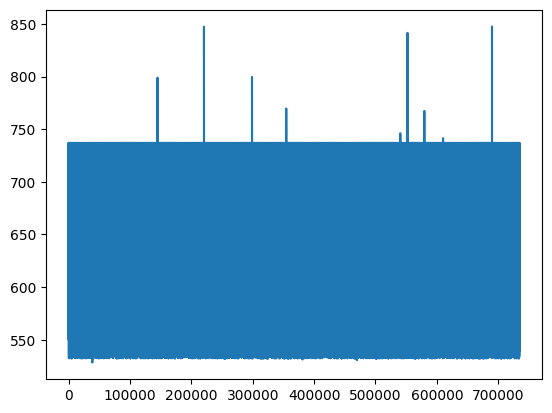

In [58]:
# Prediction
x_new=x_test
y_pred=model.predict(x_new)
plt.plot(y_pred)
plt.show()

In [59]:
y_pred

array([[736.9463],
       [736.9463],
       [736.9463],
       ...,
       [736.9463],
       [736.9463],
       [606.8713]], dtype=float32)

In [60]:
test.to_csv('file1.csv')